In [3]:
import os
import pickle
import numpy as np
import sklearn
data_path = "../data"


In [4]:
with open(data_path+"/"+"cluster_eigenvalues.txt",'rb') as rf:
    eigenvalues = pickle.load(rf)
with open(data_path+"/"+"cluster_labels.txt",'rb') as rf:
    pointlabels = pickle.load(rf)

In [5]:
eigenvalues = np.array(eigenvalues)
pointlabels = np.array(pointlabels)
pointslabels = pointlabels.reshape((-1,1))

In [6]:
print(eigenvalues.shape,pointlabels.shape)


(500, 9) (500,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics



In [8]:
X_train, X_test, y_train, y_test = \
    train_test_split(eigenvalues, pointlabels, test_size=0.333, random_state=42)


In [9]:
clf = svm.SVC(C=10,gamma=0.05)
clf.fit(X_train, y_train)

SVC(C=10, gamma=0.05)

In [10]:
predicted = clf.predict(X_test)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=10, gamma=0.05):
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.91      1.00      0.95        29
           2       0.85      0.92      0.88        37
           3       1.00      0.82      0.90        38
           4       0.89      0.97      0.93        34

    accuracy                           0.92       167
   macro avg       0.92      0.92      0.92       167
weighted avg       0.92      0.92      0.92       167




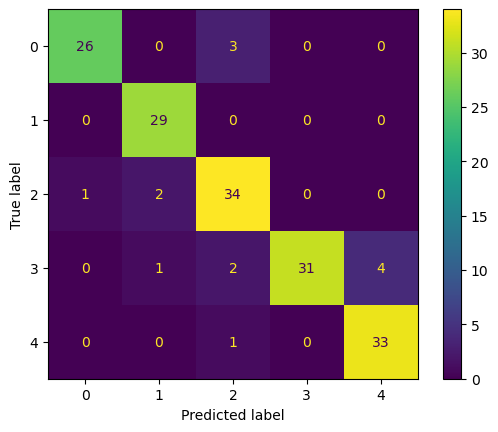

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()